In [ ]:
'''
Attention mechanism :
    - To understand transformers we first must understand the attention mechanism
    - The Attention mechanism enables the transformers to have extremely long term memory. 
      A transformer model can “attend” or “focus” on all previous tokens that have been generated.

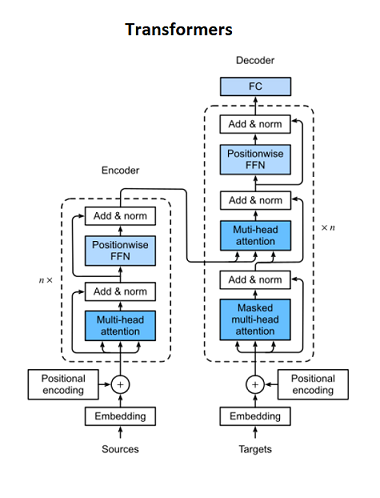

In [ ]:
'''
Input Embeddings :
    - The first step is feeding out input into a word embedding layer.

In [ ]:
'''
Positional Encoder : 
    - Embedding maps words to vector. but the same word in the different sentence may have different meanings 
      these is where positional Encoder comes.
    - It is a vector that has infomation on distances between words and sentences.
    - It uses Sine/Cosine function to generate the vector.

In [ ]:
'''
Encoder Layer :
    - It contains 2 sub-modules
        1.Multi-headed attention
        2.Fully connected network
        
    - There are also residual connections around each of the two sublayers followed by a layer normalization.

In [ ]:
'''
Multi-Headed Attention
    - In the Transformer, the Attention module repeats its computations multiple times in parallel.

In [ ]:
'''
Attention module
    - Attention module split its Query, Key, and Value parameters N-ways and passes each split independently through a 
      separate Head.

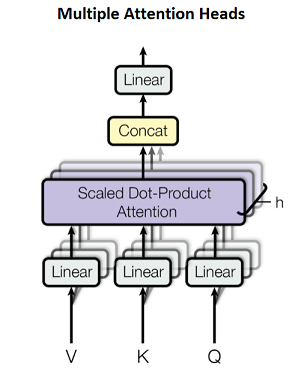

In [ ]:
'''
Inputs to the self-attention module:
    - Embedding module
    - Positional encoding
    - Truncating
    - Masking

In [ ]:
'''
Self-Attention:
    
The self-attention mechanism allows the inputs to interact with each other (“self”) and find out who they should pay more 
attention to (“attention”).The outputs are aggregates of these interactions and attention scores.

The illustrations are divided into the following steps:

1. Prepare inputs
2. Initialise weights
3. Derive key, query and value
4. Calculate attention scores for Input 1
5. Calculate softmax
6. Multiply scores with values
7. Sum weighted values to get Output 1
8. Repeat steps 4–7 for Input 2 & Input 3

In [ ]:
'''
Step 1: Prepare inputs

We start with 3 inputs for this tutorial, each with dimension 4.
Input 1: [1, 0, 1, 0] 
Input 2: [0, 2, 0, 2]
Input 3: [1, 1, 1, 1]


Input = [[1, 0, 1, 0],
         [0, 2, 0, 2],
         [1, 1, 1, 1]]

In [ ]:
'''
Step 2: Initialise weights
Every input must have three representations
These representations are called key (orange), query (red), and value (purple).

Weights for key:
[[0, 0, 1],
 [1, 1, 0],
 [0, 1, 0],
 [1, 1, 0]]
 
Weights for query:
 [[1, 0, 1],
 [1, 0, 0],
 [0, 0, 1],
 [0, 1, 1]]
 
Weights for value:
[[0, 2, 0],
 [0, 3, 0],
 [1, 0, 3],
 [1, 1, 0]]
 
# Note : weights are usually small numbers, initialised randomly using an appropriate random distribution like Gaussian, 
         Xavier and Kaiming distributions.

In [ ]:
'''
Step 3: Derive key, query and value

# 01 Obtain Key
key = np.dot(Input,weights_Key)

               [0, 0, 1]
[1, 0, 1, 0]   [1, 1, 0]   [0, 1, 1]
[0, 2, 0, 2] x [0, 1, 0] = [4, 4, 0]
[1, 1, 1, 1]   [1, 1, 0]   [2, 3, 1]

# 02 Obtain the  Value
Value = np.dot(Input,weights_Value)

               [0, 2, 0]
[1, 0, 1, 0]   [0, 3, 0]   [1, 2, 3] 
[0, 2, 0, 2] x [1, 0, 3] = [2, 8, 0]
[1, 1, 1, 1]   [1, 1, 0]   [2, 6, 3]

#03 Obtain query 
query = np.dot(Input,weights_Value)

               [1, 0, 1]
[1, 0, 1, 0]   [1, 0, 0]   [1, 0, 2]
[0, 2, 0, 2] x [0, 0, 1] = [2, 2, 2]
[1, 1, 1, 1]   [0, 1, 1]   [2, 1, 3]

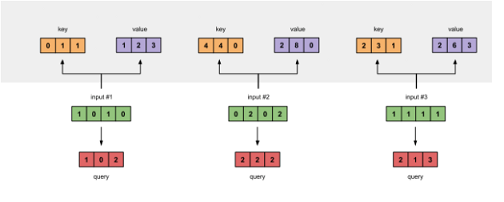

In [ ]:
'''
Step 4: Calculate attention scores

attn_scores = querys @ keys.T

[[1,0,2],   [[0,4,2],  [[2,4,4],      # attention score for query 1
 [2,2,2], x  [1,4,3], = [4,16,12],    # attention score for query 2
 [2,1,3]]    [1,0,1]]   [4,12,10]]    # attention score for query 3

In [ ]:
'''
Step 5: Calculate softmax
from torch.nn.functional import softmax

attn_scores_softmax = softmax(attn_scores, dim=-1)

# For readability, approximate the above as follows
attn_scores_softmax = [
  [0.0, 0.5, 0.5],
  [0.0, 1.0, 0.0],
  [0.0, 0.9, 0.1]
]
attn_scores_softmax = torch.tensor(attn_scores_softmax)

In [ ]:
'''
Step 6: Multiply scores with values

weighted_values = values[:,None] * attn_scores_softmax.T[:,:,None]

# tensor([[[0.0000, 0.0000, 0.0000],
#          [0.0000, 0.0000, 0.0000],
#          [0.0000, 0.0000, 0.0000]],
# 
#         [[1.0000, 4.0000, 0.0000],
#          [2.0000, 8.0000, 0.0000],
#          [1.8000, 7.2000, 0.0000]],
# 
#         [[1.0000, 3.0000, 1.5000],
#          [0.0000, 0.0000, 0.0000],
#          [0.2000, 0.6000, 0.3000]]])

In [ ]:
'''
Step 7: Sum weighted values

outputs = weighted_values.sum(dim=0)

# tensor([[2.0000, 7.0000, 1.5000],  # Output 1
#         [2.0000, 8.0000, 0.0000],  # Output 2
#         [2.0000, 7.8000, 0.3000]]) # Output 3

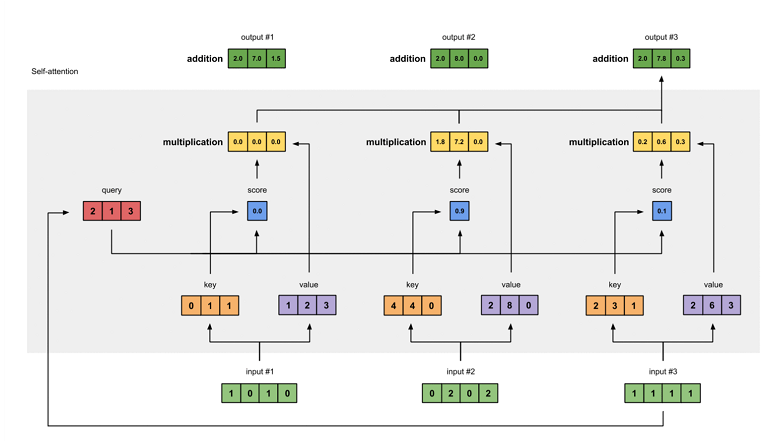